# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [1]:
import numpy as np
import pandas as pd
from prettytable import PrettyTable
# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))


No of Features: 561


## Obtain the  train data 

In [2]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

D:\installed\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
6015,0.2797,-0.004397,-0.10952,0.359081,0.119909,-0.177541,0.337963,0.066883,-0.221876,0.474093,...,0.049658,0.602595,0.681696,0.51333,-0.862824,0.190833,0.038933,27,3,WALKING_DOWNSTAIRS


In [3]:
train.shape

(7352, 564)

## Obtain the  test data 

In [4]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

D:\installed\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2261,0.279196,-0.018261,-0.103376,-0.996955,-0.982959,-0.988239,-0.9972,-0.982509,-0.986964,-0.940634,...,-0.268441,-0.215632,-0.465366,0.098119,-0.612458,-0.033918,-0.224544,20,4,SITTING


In [5]:
test.shape

(2947, 564)

# Data Cleaning

## 1. Check for Duplicates

In [6]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [7]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

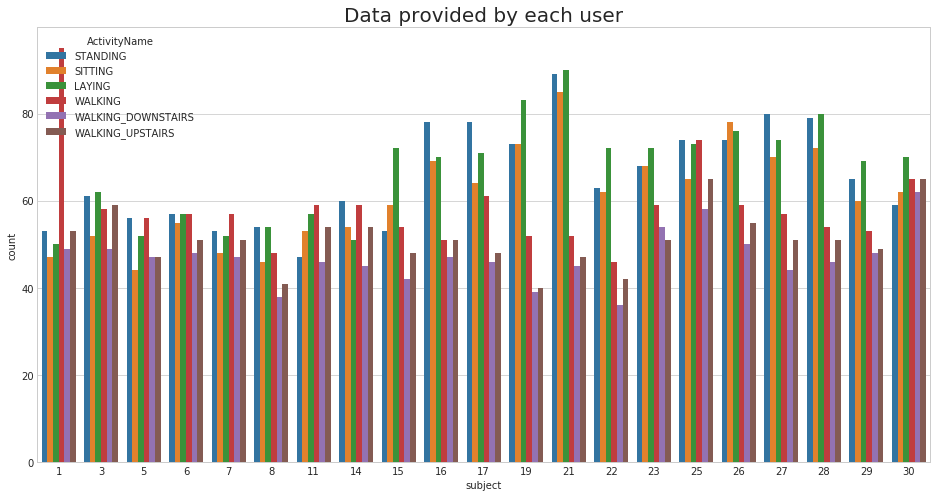

In [9]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


> We have got almost same number of reading from all the subjects

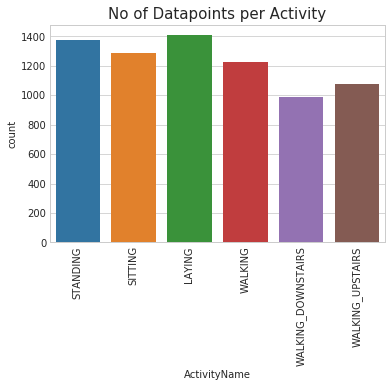

In [10]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

### Observation
> Our data is well balanced (almost)

## 4. Changing feature names 

In [11]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## 5. Save this dataframe in a csv files

In [13]:
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

# Exploratory Data Analysis

"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"

### 1. Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

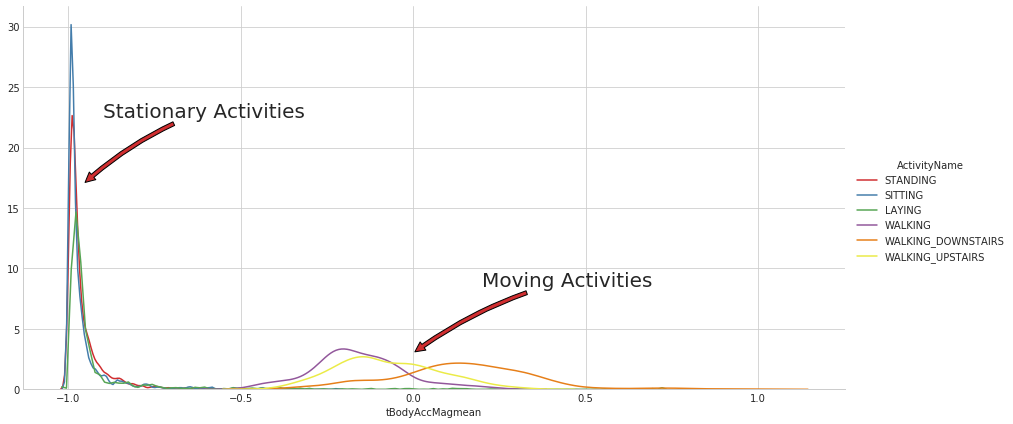

In [14]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

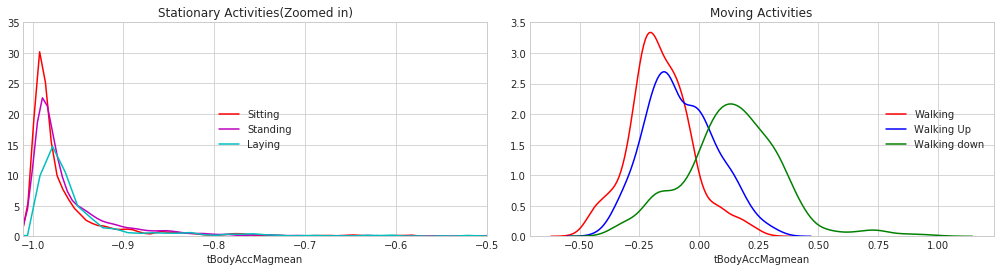

In [15]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

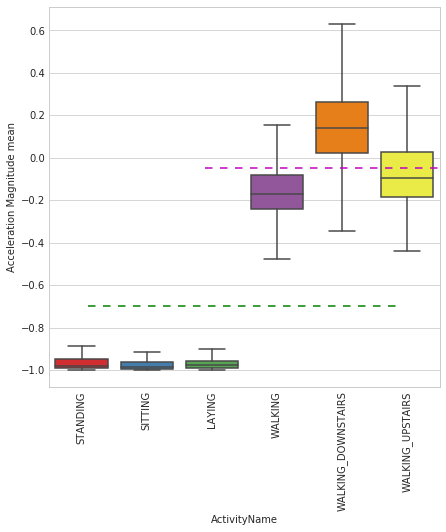

In [16]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

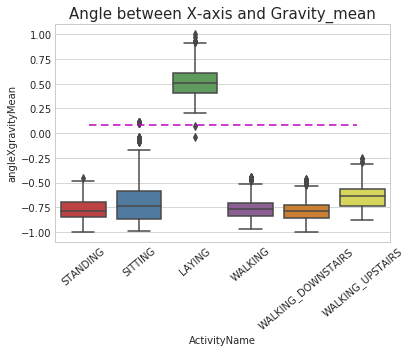

In [17]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

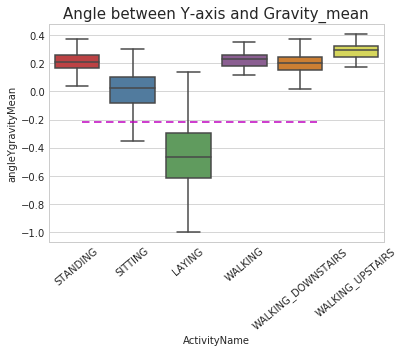

In [18]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Apply t-sne on the data 

In [46]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.426s...
[t-SNE] Computed neighbors for 7352 samples in 72.001s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.071s
[t-SNE] Iteration 50: error = 124.8017578, gradient norm = 0.0253939 (50 iterations in 16.625s)
[t-SNE] Iteration 100: error = 107.2019501, gradient norm = 0.0284782 (50 iterations i

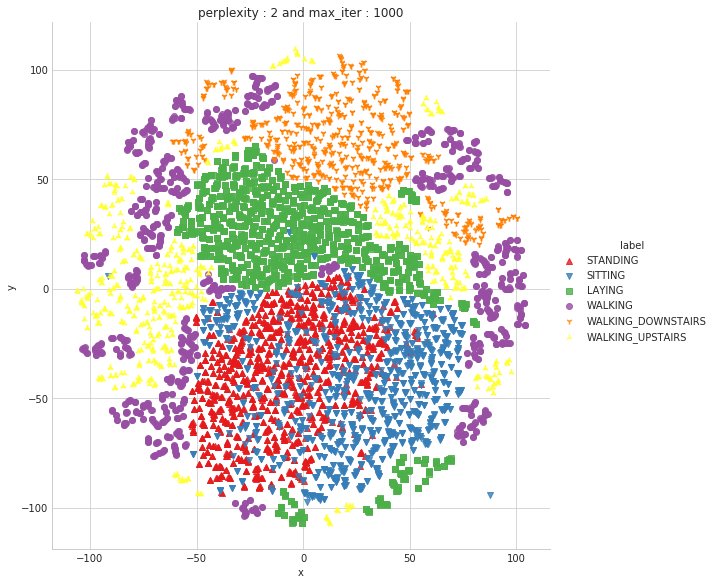

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.263s...
[t-SNE] Computed neighbors for 7352 samples in 48.983s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.122s
[t-SNE] Iteration 50: error = 114.1862640, gradient norm = 0.0184120 (50 iterations in 55.655s)
[t-SNE] Iteration 100: error = 97.6535568, gradient norm = 0.0174309 (50 iterati

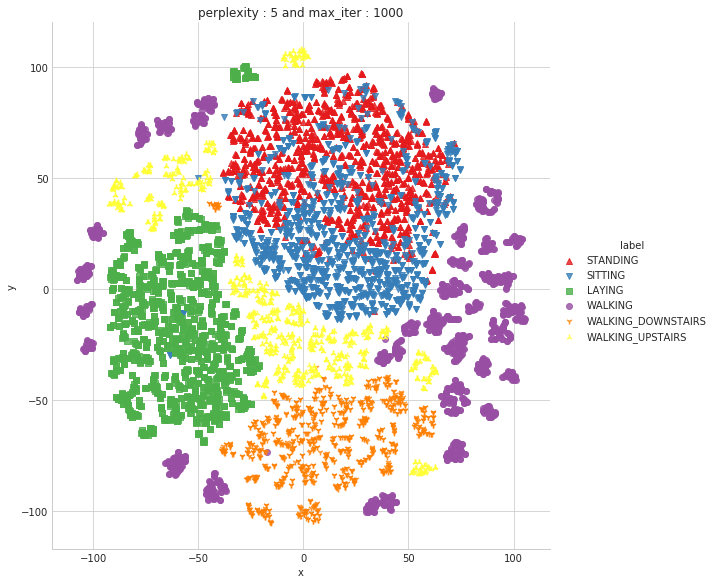

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.410s...
[t-SNE] Computed neighbors for 7352 samples in 64.801s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.214s
[t-SNE] Iteration 50: error = 106.0169220, gradient norm = 0.0194293 (50 iterations in 24.550s)
[t-SNE] Iteration 100: error = 90.3036194, gradient norm = 0.0097653 (50 iterat

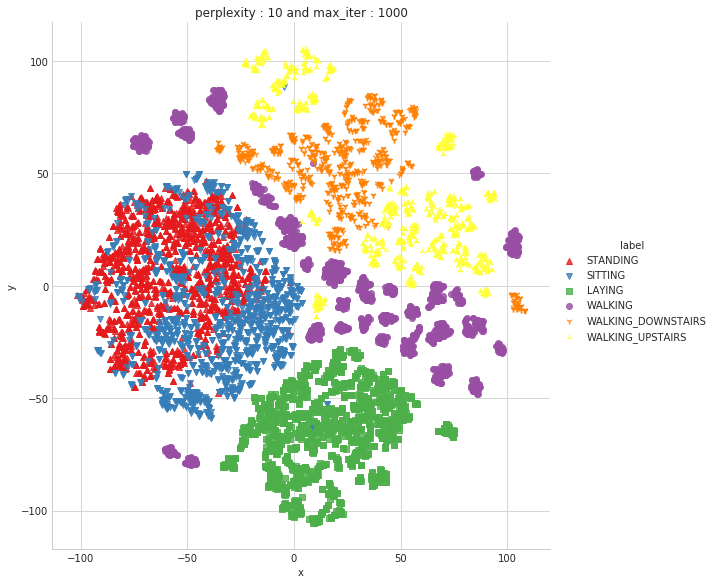

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.425s...
[t-SNE] Computed neighbors for 7352 samples in 61.792s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.355s
[t-SNE] Iteration 50: error = 97.5202179, gradient norm = 0.0223863 (50 iterations in 21.168s)
[t-SNE] Iteration 100: error = 83.9500732, gradient norm = 0.0059110 (50 iterati

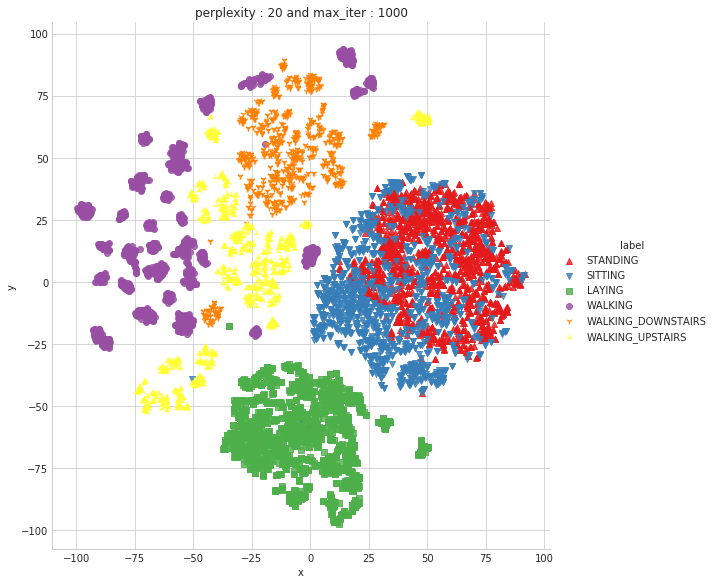

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.376s...
[t-SNE] Computed neighbors for 7352 samples in 73.164s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.844s
[t-SNE] Iteration 50: error = 86.1525574, gradient norm = 0.0242986 (50 iterations in 36.249s)
[t-SNE] Iteration 100: error = 75.9874649, gradient norm = 0.0061005 (50 iterat

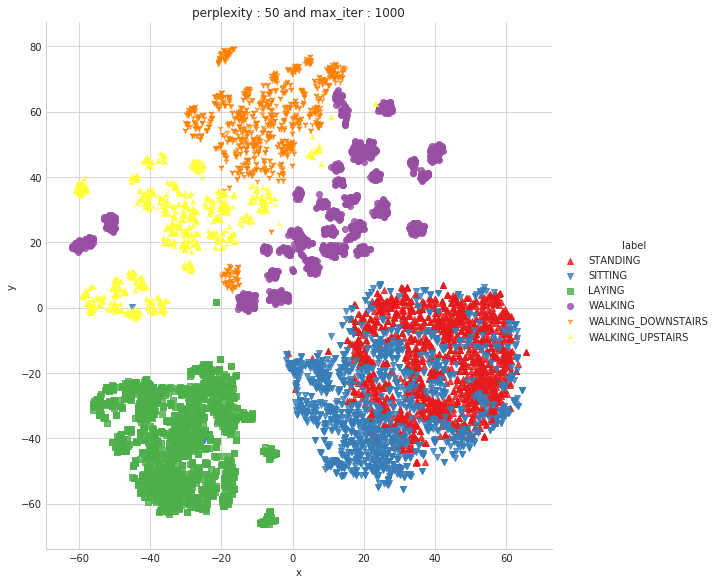

Done


In [48]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

# Machine Learning Modeling

In [1]:
import numpy as np
import pandas as pd

## Obtain the train and test data

In [2]:
train = pd.read_csv('UCI_HAR_dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_dataset/csv_files/test.csv')
print(train.shape, test.shape)



(7352, 564) (2947, 564)


In [3]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING


In [4]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [5]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [6]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Let's model with our data

### Labels that are useful in plotting confusion matrix

In [7]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot the confusion matrix

In [8]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [9]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

### Method to print the gridsearch Attributes

In [10]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    
    

# 1. Logistic Regression with Grid Search

In [11]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.2min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:01:25.843810


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.009192


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  1 428  58   0   0   4]
 [  0  12 519   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


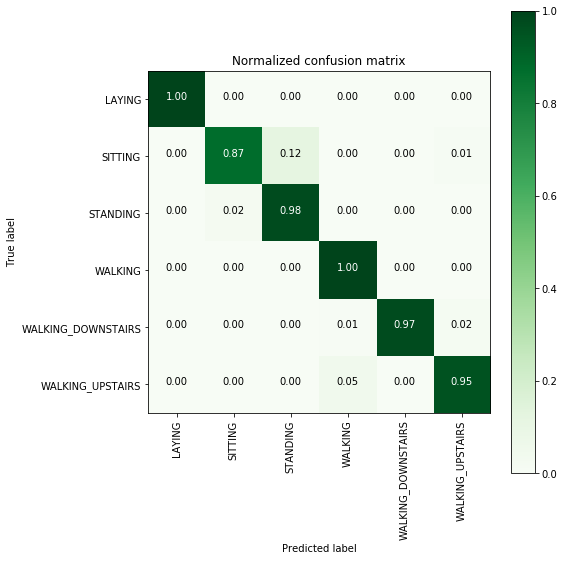

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

       avg / total       0.96      0.96      0.96      2947



In [12]:

# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


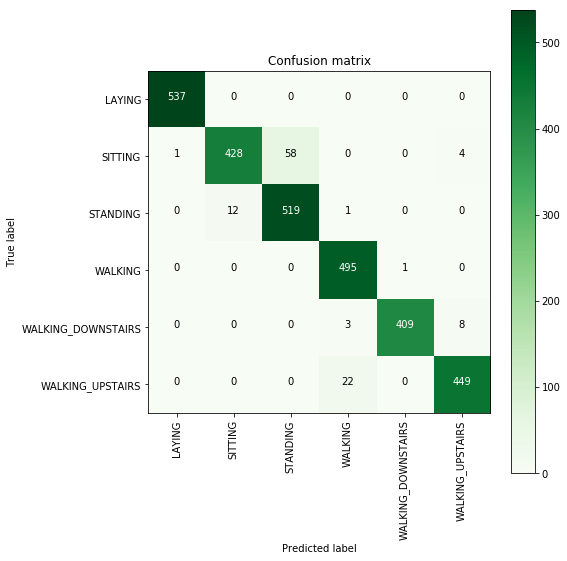

In [13]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [14]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9461371055495104



#  2. Linear SVC with GridSearch

In [15]:
from sklearn.svm import LinearSVC

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   24.9s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:32.951942


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.012182


---------------------
|      Accuracy      |
---------------------

    0.9660671869697998


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 426  58   0   0   5]
 [  0  14 518   0   0   0]
 [  0   0   0 495   0   1]
 [  0   0   0   2 413   5]
 [  0   0   0  12   1 458]]


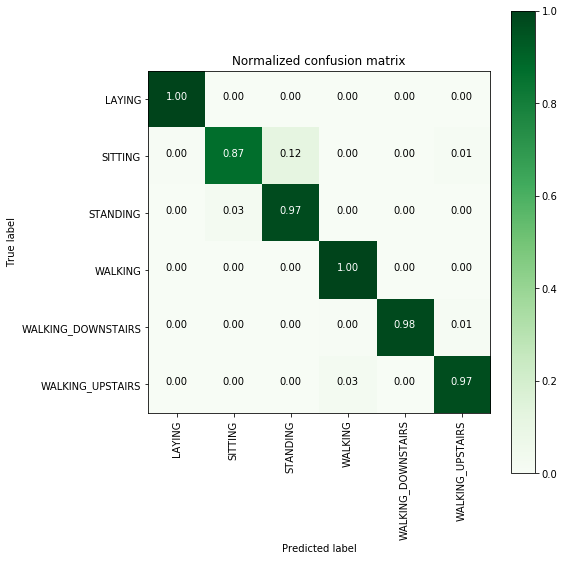

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.97      0.94       532
           WALKING       0.97      1.00      0.99       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.97       471

       avg / total       0.97      0.97      0.97      2947



In [16]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [17]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=8, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
     verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 8}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9465451577801959



# 3.  Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:05:46.182889


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:05.221285


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


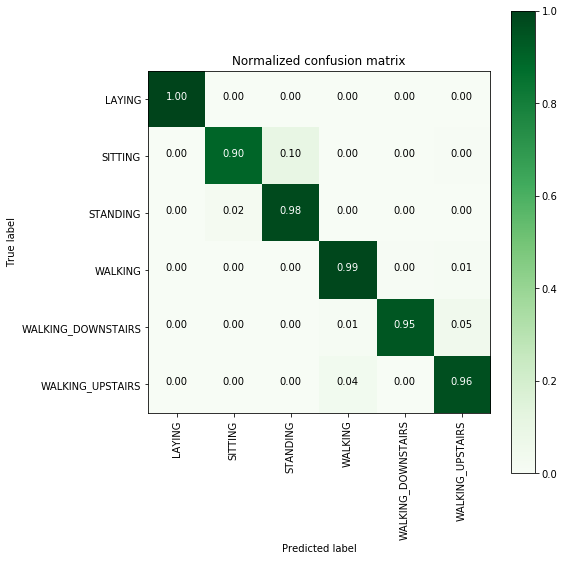

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

       avg / total       0.96      0.96      0.96      2947



In [18]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [19]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9440968443960827



# 4. Decision Trees with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:19.476858


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.012858


---------------------
|      Accuracy      |
---------------------

    0.8642687478791992


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 386 105   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 472  16   8]
 [  0   0   0  15 344  61]
 [  0   0   0  73  29 369]]


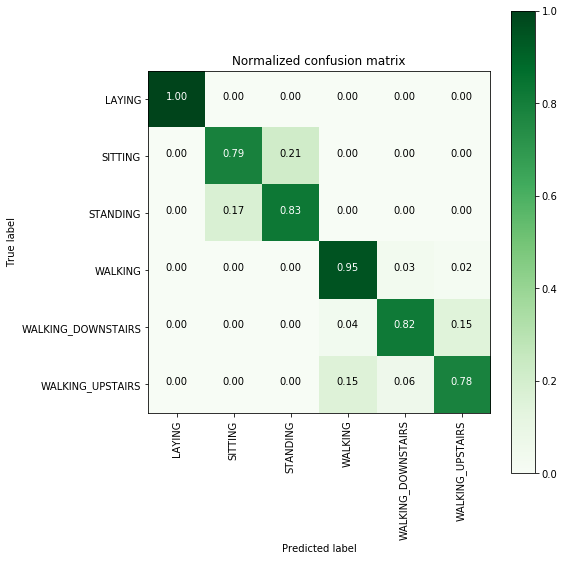

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.88      0.82      0.85       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

       avg / total       0.86      0.86      0.86      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

--------

In [20]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

# 5. Random Forest Classifier with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:06:22.775270


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.025937


---------------------
|      Accuracy      |
---------------------

    0.9131319986426875


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 427  64   0   0   0]
 [  0  52 480   0   0   0]
 [  0   0   0 484  10   2]
 [  0   0   0  38 332  50]
 [  0   0   0  34   6 431]]


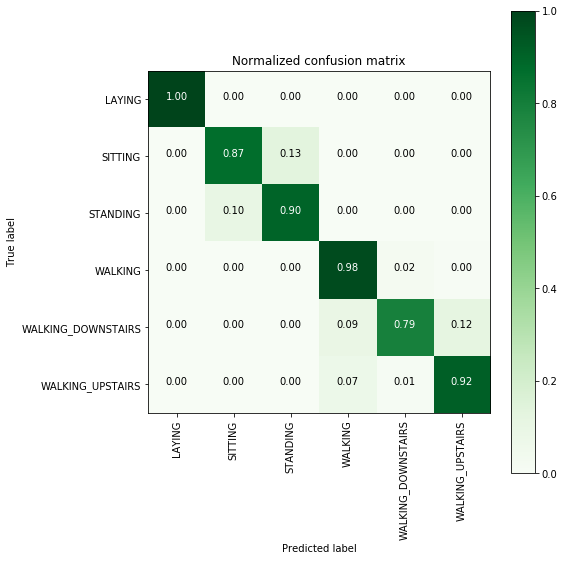

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.89      0.87      0.88       491
          STANDING       0.88      0.90      0.89       532
           WALKING       0.87      0.98      0.92       496
WALKING_DOWNSTAIRS       0.95      0.79      0.86       420
  WALKING_UPSTAIRS       0.89      0.92      0.90       471

       avg / total       0.92      0.91      0.91      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
            oob_score=False

In [21]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

# 6.  Gradient Boosted Decision Trees With GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:28:03.653432


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.058843


---------------------
|      Accuracy      |
---------------------

    0.9222938581608415


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 396  93   0   0   2]
 [  0  37 495   0   0   0]
 [  0   0   0 483   7   6]
 [  0   0   0  10 374  36]
 [  0   1   0  31   6 433]]


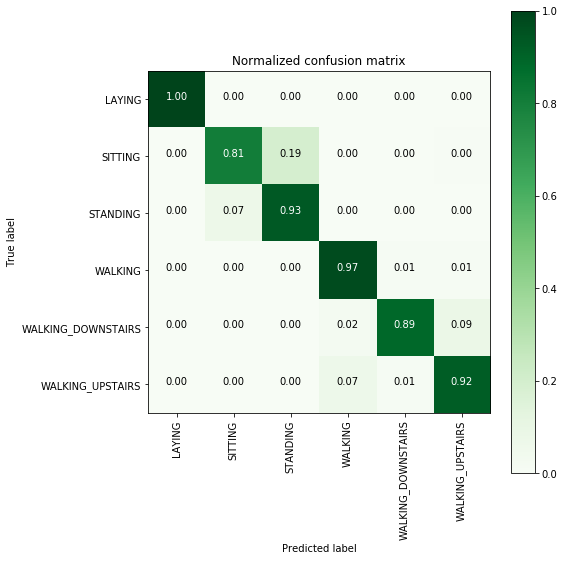

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.81      0.86       491
          STANDING       0.84      0.93      0.88       532
           WALKING       0.92      0.97      0.95       496
WALKING_DOWNSTAIRS       0.97      0.89      0.93       420
  WALKING_UPSTAIRS       0.91      0.92      0.91       471

       avg / total       0.92      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimato

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])


# 7. Comparing all models

In [23]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.27%       3.733%
Linear SVC          : 96.61%       3.393% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 86.43%      13.57% 
Random Forest       : 91.31%      8.687% 
GradientBoosting DT : 91.31%      8.687% 


> We can choose ___Logistic regression___ or ___Linear SVC___ or ___rbf SVM___.

# Conclusion :

In the real world, domain-knowledge, EDA and feature-engineering matter most.

In [1]:
# Importing Librari
import keras
import pandas as pd
import numpy as np
import hyperas
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform,pchoice
import matplotlib.pyplot as plt
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

# Importing libraries
from keras.optimizers import Adam,SGD,RMSprop
from keras.initializers import RandomUniform,he_uniform,glorot_normal
from keras.regularizers import l1
from keras.models import Sequential
from keras.layers import LSTM,BatchNormalization
from keras.layers.core import Dense, Dropout
from prettytable import PrettyTable

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


###### - Defining the Architecture of LSTM with 2 layers

In [17]:
def data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
    }
    SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
     ]
    
    signals_data_train = []
    for signal in SIGNALS:
        filename = f"UCI_HAR_Dataset/train/Inertial Signals/{signal}_train.txt"
        signals_data_train.append(pd.read_csv(filename, delim_whitespace=True, header=None).as_matrix()) 
   
    
    
    X_train = np.transpose(signals_data_train, (1, 2, 0))
    signals_data_test = []
    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/test/Inertial Signals/{signal}_test.txt'
        signals_data_test.append(
             pd.read_csv(filename, delim_whitespace=True, header=None).as_matrix()) 
   
    
    X_test = np.transpose(signals_data_test, (1, 2, 0))
    
    
    filename = f'UCI_HAR_Dataset/train/y_train.txt'
    y_tr = pd.read_csv(filename, delim_whitespace=True, header=None)[0]
    y_train = pd.get_dummies(y_tr).as_matrix()
    
    filename = f'UCI_HAR_Dataset/test/y_test.txt'
    y_ts = pd.read_csv(filename, delim_whitespace=True, header=None)[0]
    y_test = pd.get_dummies(y_ts).as_matrix()
    
    

    return X_train, y_train,X_test, y_test
    

In [11]:
# Initiliazing the sequential model
def optimum_LSTM(X_train,y_train,X_test,y_test):
    model = Sequential()
    
    model.add(LSTM(units={{choice([16,32,64,128,256])}},activation= {{choice(['sigmoid','relu','tanh'])}},
                   kernel_regularizer=l1(0.01),return_sequences=True,input_shape=(128, 9)))   
    model.add(BatchNormalization())
    model.add(Dropout({{choice([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])}}))
   
    
    # Configuring the parameters
    model.add(LSTM(units={{choice([16,32,64,128,256])}},activation= {{choice(['sigmoid','relu','tanh'])}},
                   kernel_regularizer=l1(0.01)))
    # Adding a dropout layer
    model.add(BatchNormalization())
    model.add(Dropout({{choice([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])}}))
    model.add(Dropout({{choice([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])}}))
    # Adding a dense output layer with sigmoid activation
    model.add(Dense(6, activation={{choice(['sigmoid','softmax'])}}))
    model.summary()
    print('#'*117)
    model.compile(optimizer={{choice(['rmsprop', 'adam', 'sgd'])}},
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(X_train,
              y_train,
              batch_size = {{choice([128,256,512])}},         
              epochs={{choice([30,50,60])}},
              validation_split = 0.1,verbose=2)
    print('-'*117)
    model_paras = model.history
    print("The number of epochs model is trained for :",len(model_paras.history['loss']))
    print("="*117)
    #Plot of validation and train loss
# list of epoch numbers
    x = list(range(1,len(model_paras.history['loss']) + 1))
    plt.figure(figsize=(5,5))
    plt.plot(x,model_paras.history['val_loss'],color = 'r',label = 'Validation loss')
    plt.plot(x,model_paras.history['loss'],color = 'b',label = 'Training loss')
    plt.grid()
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('categorical_crossentropy')
    plt.show()

    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    score, acc = model.evaluate(X_test, y_test, verbose=0)
    print('Test accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}


>>> Imports:
#coding=utf-8

try:
    import keras
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import hyperas
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    from keras import backend as K
except:
    pass

try:
    from keras.optimizers import Adam, SGD, RMSprop
except:
    pass

try:
    from keras.initializers import RandomUniform, he_uniform, glorot_normal
except:
    pass

try:
    from keras.regularizers import l1
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import LSTM, BatchNormalization
except:
    pass

try:
    from keras.layers.core import Dense, Dropout

C:\Users\Mrunal\Desktop\MAchine Learning\Human Activity Recognition\HAR\temp_model.py:111: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  signals_data_train.append(pd.read_csv(filename, delim_whitespace=True, header=None).as_matrix())
C:\Users\Mrunal\Desktop\MAchine Learning\Human Activity Recognition\HAR\temp_model.py:120: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  pd.read_csv(filename, delim_whitespace=True, header=None).as_matrix())
C:\Users\Mrunal\Desktop\MAchine Learning\Human Activity Recognition\HAR\temp_model.py:128: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_train = pd.get_dummies(y_tr).as_matrix()
C:\Users\Mrunal\Desktop\MAchine Learning\Human Activity Recognition\HAR\temp_model.py:132: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_test = pd.get_dummies(y_ts).as_matrix()


_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_1 (LSTM)                (None, 128, 16)           1664                                                            
_________________________________________________________________                                                      
batch_normalization_1 (Batch (None, 128, 16)           64                                                              
_________________________________________________________________                                                      
dropout_1 (Dropout)          (None, 128, 16)           0                                                               
_________________________________________________________________                                                      
lstm_2 (LSTM)                (None, 32) 

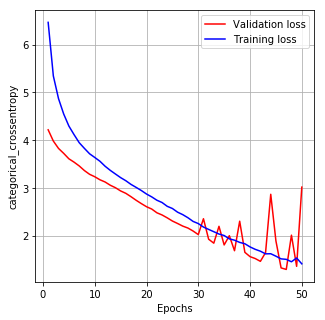

Accuracy: 41.06%                                                                                                       
Test accuracy:                                                                                                         
0.4105870376654225                                                                                                     
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_3 (LSTM)                (None, 128, 32)           5376                                                            
_________________________________________________________________                                                      
batch_normalization_3 (Batch (None, 128, 32)           128                                                             
________________________________________

 - 11s - loss: 0.4003 - acc: 0.9420 - val_loss: 0.5767 - val_acc: 0.9198                                               

Epoch 55/60                                                                                                            
 - 11s - loss: 0.3863 - acc: 0.9495 - val_loss: 0.5179 - val_acc: 0.9035                                               

Epoch 56/60                                                                                                            
 - 12s - loss: 0.3880 - acc: 0.9479 - val_loss: 0.3682 - val_acc: 0.9321                                               

Epoch 57/60                                                                                                            
 - 11s - loss: 0.4047 - acc: 0.9462 - val_loss: 0.4932 - val_acc: 0.9158                                               

Epoch 58/60                                                                                                            
 - 11s - loss: 0.3594 - acc: 0.9516 

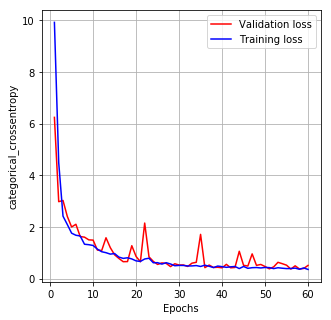

Accuracy: 90.91%                                                                                                       
Test accuracy:                                                                                                         
0.9090600610790635                                                                                                     
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_5 (LSTM)                (None, 128, 256)          272384                                                          
_________________________________________________________________                                                      
batch_normalization_5 (Batch (None, 128, 256)          1024                                                            
________________________________________

 - 22s - loss: 39.7879 - acc: 0.5204 - val_loss: 39.8661 - val_acc: 0.5000                                             

Epoch 55/60                                                                                                            
 - 21s - loss: 39.8101 - acc: 0.5121 - val_loss: 39.8734 - val_acc: 0.4864                                             

Epoch 56/60                                                                                                            
 - 21s - loss: 39.7916 - acc: 0.5268 - val_loss: 39.8580 - val_acc: 0.4878                                             

Epoch 57/60                                                                                                            
 - 21s - loss: 39.8033 - acc: 0.5086 - val_loss: 39.8445 - val_acc: 0.4823                                             

Epoch 58/60                                                                                                            
 - 21s - loss: 39.7797 - acc: 0.5255

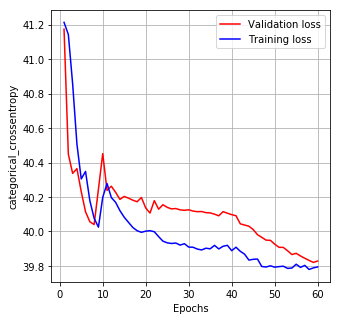

Accuracy: 45.13%                                                                                                       
Test accuracy:                                                                                                         
0.45130641331177546                                                                                                    
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_7 (LSTM)                (None, 128, 64)           18944                                                           
_________________________________________________________________                                                      
batch_normalization_7 (Batch (None, 128, 64)           256                                                             
________________________________________

 - 31s - loss: 0.2720 - acc: 0.9460 - val_loss: 0.5212 - val_acc: 0.8111                                               

Epoch 55/60                                                                                                            
 - 31s - loss: 0.2653 - acc: 0.9500 - val_loss: 0.2480 - val_acc: 0.9076                                               

Epoch 56/60                                                                                                            
 - 32s - loss: 0.2521 - acc: 0.9504 - val_loss: 0.2796 - val_acc: 0.9253                                               

Epoch 57/60                                                                                                            
 - 32s - loss: 0.2770 - acc: 0.9480 - val_loss: 0.2264 - val_acc: 0.9334                                               

Epoch 58/60                                                                                                            
 - 32s - loss: 0.2772 - acc: 0.9459 

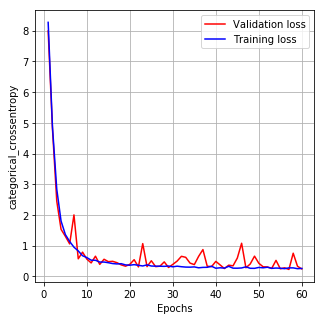

Accuracy: 91.04%                                                                                                       
Test accuracy:                                                                                                         
0.9104173736002714                                                                                                     
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_9 (LSTM)                (None, 128, 256)          272384                                                          
_________________________________________________________________                                                      
batch_normalization_9 (Batch (None, 128, 256)          1024                                                            
________________________________________

 - 13s - loss: 0.5585 - acc: 0.9137 - val_loss: 0.4697 - val_acc: 0.9266                                               

Epoch 55/60                                                                                                            
 - 13s - loss: 0.5336 - acc: 0.9167 - val_loss: 0.4897 - val_acc: 0.9253                                               

Epoch 56/60                                                                                                            
 - 13s - loss: 0.4755 - acc: 0.9312 - val_loss: 0.5389 - val_acc: 0.8981                                               

Epoch 57/60                                                                                                            
 - 13s - loss: 0.6561 - acc: 0.8836 - val_loss: 0.5667 - val_acc: 0.8872                                               

Epoch 58/60                                                                                                            
 - 13s - loss: 0.4703 - acc: 0.9355 

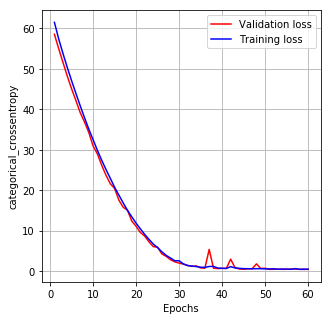

Accuracy: 90.40%                                                                                                       
Test accuracy:                                                                                                         
0.9039701391245334                                                                                                     
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_11 (LSTM)               (None, 128, 64)           18944                                                           
_________________________________________________________________                                                      
batch_normalization_11 (Batc (None, 128, 64)           256                                                             
________________________________________

 - 20s - loss: 0.6144 - acc: 0.8499 - val_loss: 0.6363 - val_acc: 0.7894                                               

Epoch 55/60                                                                                                            
 - 20s - loss: 0.6266 - acc: 0.8496 - val_loss: 0.5840 - val_acc: 0.8791                                               

Epoch 56/60                                                                                                            
 - 20s - loss: 0.5749 - acc: 0.8650 - val_loss: 1.4193 - val_acc: 0.5353                                               

Epoch 57/60                                                                                                            
 - 21s - loss: 0.5629 - acc: 0.8674 - val_loss: 0.9735 - val_acc: 0.7188                                               

Epoch 58/60                                                                                                            
 - 20s - loss: 0.5728 - acc: 0.8641 

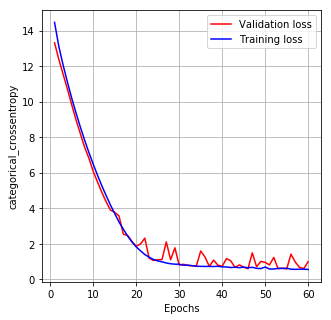

Accuracy: 65.32%                                                                                                       
Test accuracy:                                                                                                         
0.6532066508515795                                                                                                     
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_13 (LSTM)               (None, 128, 128)          70656                                                           
_________________________________________________________________                                                      
batch_normalization_13 (Batc (None, 128, 128)          512                                                             
________________________________________

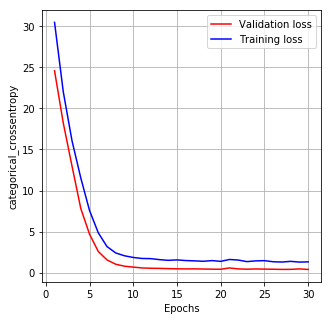

Accuracy: 16.83%                                                                                                       
Test accuracy:                                                                                                         
0.168306752629793                                                                                                      
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_15 (LSTM)               (None, 128, 128)          70656                                                           
_________________________________________________________________                                                      
batch_normalization_15 (Batc (None, 128, 128)          512                                                             
________________________________________

 - 6s - loss: 24.6625 - acc: 0.3771 - val_loss: 24.8160 - val_acc: 0.2731                                              

Epoch 55/60                                                                                                            
 - 6s - loss: 24.6658 - acc: 0.3801 - val_loss: 24.8112 - val_acc: 0.2867                                              

Epoch 56/60                                                                                                            
 - 6s - loss: 24.6579 - acc: 0.3833 - val_loss: 24.8098 - val_acc: 0.2772                                              

Epoch 57/60                                                                                                            
 - 6s - loss: 24.6538 - acc: 0.3729 - val_loss: 24.8072 - val_acc: 0.2745                                              

Epoch 58/60                                                                                                            
 - 6s - loss: 24.6702 - acc: 0.3877 

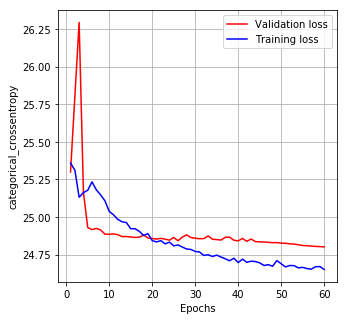

Accuracy: 35.02%                                                                                                       
Test accuracy:                                                                                                         
0.3501866304817789                                                                                                     
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_17 (LSTM)               (None, 128, 64)           18944                                                           
_________________________________________________________________                                                      
batch_normalization_17 (Batc (None, 128, 64)           256                                                             
________________________________________

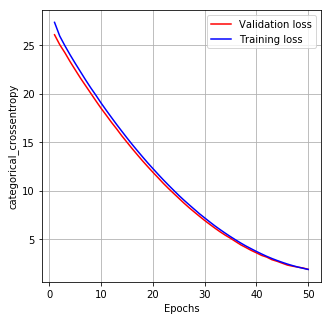

Accuracy: 76.65%                                                                                                       
Test accuracy:                                                                                                         
0.7665422463522226                                                                                                     
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_19 (LSTM)               (None, 128, 128)          70656                                                           
_________________________________________________________________                                                      
batch_normalization_19 (Batc (None, 128, 128)          512                                                             
________________________________________

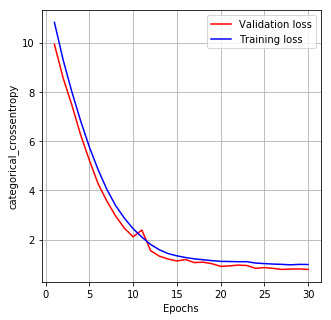

Accuracy: 76.93%                                                                                                       
Test accuracy:                                                                                                         
0.7692568713946386                                                                                                     
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_21 (LSTM)               (None, 128, 128)          70656                                                           
_________________________________________________________________                                                      
batch_normalization_21 (Batc (None, 128, 128)          512                                                             
________________________________________

 - 19s - loss: 1.3776 - acc: 0.4658 - val_loss: 2.1818 - val_acc: 0.3288                                               

Epoch 55/60                                                                                                            
 - 19s - loss: 1.4402 - acc: 0.4504 - val_loss: 1.2173 - val_acc: 0.5815                                               

Epoch 56/60                                                                                                            
 - 19s - loss: 1.3104 - acc: 0.4773 - val_loss: 1.2012 - val_acc: 0.4226                                               

Epoch 57/60                                                                                                            
 - 19s - loss: 1.3078 - acc: 0.4790 - val_loss: 1.2582 - val_acc: 0.3913                                               

Epoch 58/60                                                                                                            
 - 19s - loss: 1.2655 - acc: 0.4849 

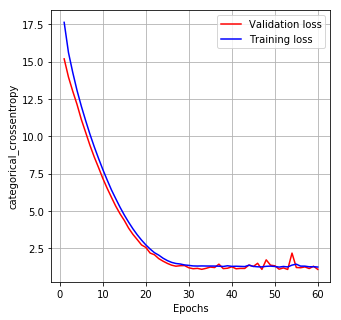

Accuracy: 53.41%                                                                                                       
Test accuracy:                                                                                                         
0.5341024770953512                                                                                                     
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_23 (LSTM)               (None, 128, 256)          272384                                                          
_________________________________________________________________                                                      
batch_normalization_23 (Batc (None, 128, 256)          1024                                                            
________________________________________

 - 12s - loss: 13.4603 - acc: 0.3791 - val_loss: 13.8179 - val_acc: 0.1807                                             

Epoch 55/60                                                                                                            
 - 12s - loss: 13.4863 - acc: 0.3762 - val_loss: 13.5994 - val_acc: 0.1793                                             

Epoch 56/60                                                                                                            
 - 12s - loss: 13.6682 - acc: 0.3312 - val_loss: 13.6702 - val_acc: 0.3111                                             

Epoch 57/60                                                                                                            
 - 12s - loss: 14.1104 - acc: 0.2080 - val_loss: 13.9309 - val_acc: 0.1685                                             

Epoch 58/60                                                                                                            
 - 12s - loss: 14.1429 - acc: 0.1951

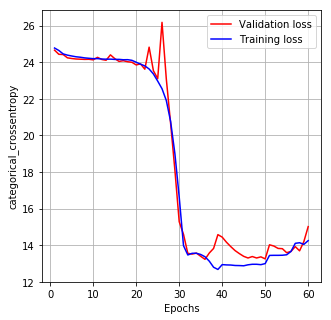

Accuracy: 20.73%                                                                                                       
Test accuracy:                                                                                                         
0.20732948761452324                                                                                                    
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_25 (LSTM)               (None, 128, 32)           5376                                                            
_________________________________________________________________                                                      
batch_normalization_25 (Batc (None, 128, 32)           128                                                             
________________________________________

 - 19s - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1603                                                     

Epoch 55/60                                                                                                            
 - 19s - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1603                                                     

Epoch 56/60                                                                                                            
 - 19s - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1603                                                     

Epoch 57/60                                                                                                            
 - 19s - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1603                                                     

Epoch 58/60                                                                                                            
 - 19s - loss: nan - acc: 0.1675 - v

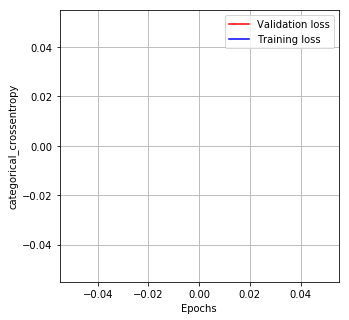

Accuracy: 16.83%                                                                                                       
Test accuracy:                                                                                                         
0.168306752629793                                                                                                      
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_27 (LSTM)               (None, 128, 32)           5376                                                            
_________________________________________________________________                                                      
batch_normalization_27 (Batc (None, 128, 32)           128                                                             
________________________________________

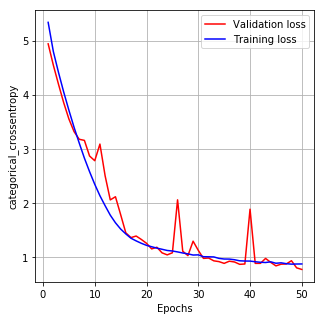

Accuracy: 55.17%                                                                                                       
Test accuracy:                                                                                                         
0.5517475398710553                                                                                                     
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_29 (LSTM)               (None, 128, 16)           1664                                                            
_________________________________________________________________                                                      
batch_normalization_29 (Batc (None, 128, 16)           64                                                              
________________________________________

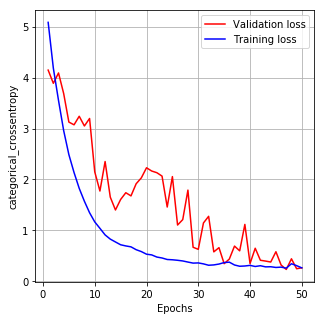

Accuracy: 85.17%                                                                                                       
Test accuracy:                                                                                                         
0.8517136070580251                                                                                                     
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_31 (LSTM)               (None, 128, 32)           5376                                                            
_________________________________________________________________                                                      
batch_normalization_31 (Batc (None, 128, 32)           128                                                             
________________________________________

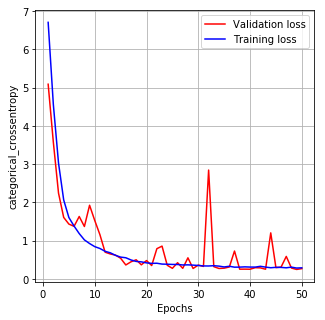

Accuracy: 85.92%                                                                                                       
Test accuracy:                                                                                                         
0.8591788259246692                                                                                                     
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_33 (LSTM)               (None, 128, 32)           5376                                                            
_________________________________________________________________                                                      
batch_normalization_33 (Batc (None, 128, 32)           128                                                             
________________________________________

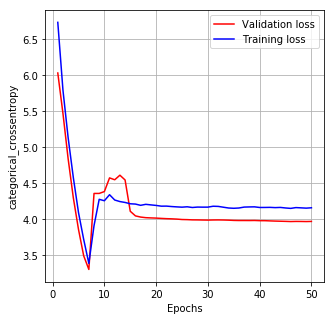

Accuracy: 34.68%                                                                                                       
Test accuracy:                                                                                                         
0.34679334916864607                                                                                                    
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_35 (LSTM)               (None, 128, 16)           1664                                                            
_________________________________________________________________                                                      
batch_normalization_35 (Batc (None, 128, 16)           64                                                              
________________________________________

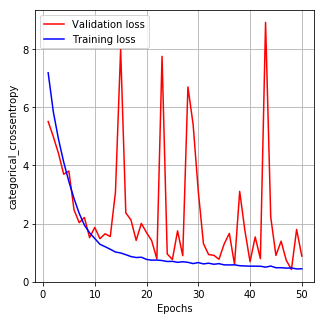

Accuracy: 77.37%                                                                                                       
Test accuracy:                                                                                                         
0.7736681370885646                                                                                                     
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_37 (LSTM)               (None, 128, 16)           1664                                                            
_________________________________________________________________                                                      
batch_normalization_37 (Batc (None, 128, 16)           64                                                              
________________________________________

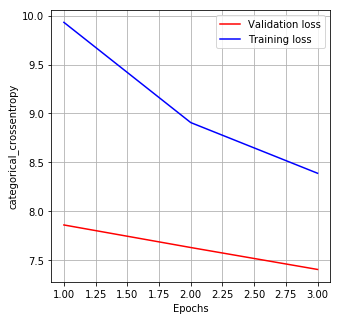

Accuracy: 16.83%                                                                                                       
Test accuracy:                                                                                                         
0.168306752629793                                                                                                      
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_39 (LSTM)               (None, 128, 16)           1664                                                            
_________________________________________________________________                                                      
batch_normalization_39 (Batc (None, 128, 16)           64                                                              
________________________________________

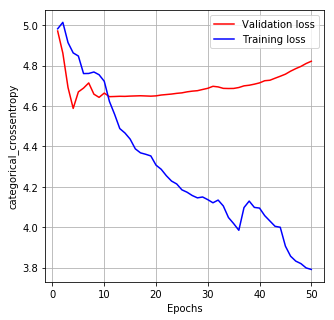

Accuracy: 21.68%                                                                                                       
Test accuracy:                                                                                                         
0.2168306752629793                                                                                                     
100%|███████████████████████████████████████████████| 20/20 [4:08:51<00:00, 486.37s/it, best loss: -0.9104173736002714]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Evalutation of best performing model:
2947/2947 [==============================] - ETA: 15 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 14s 5ms/step
[0.3339131542098777, 0.9104173736002714]
Best performing model chosen hyper-parameters:
{'Dropout': 1, 'Dropout_1': 1

In [12]:
best_run, best_model = optim.minimize(model=optimum_LSTM,
                                          data=data,
                                          max_evals=20,
                                          algo=tpe.suggest,
                                        notebook_name = "HAR_LSTM",
                                          trials=Trials())
X_train, y_train, X_test, y_test = data()
print("Evalutation of best performing model:") 
print(best_model.evaluate(X_test, y_test))
print("Best performing model chosen hyper-parameters:")
print(best_run)


# LSTM with 3 layers

In [3]:
# Initiliazing the sequential model
def optimum_model(X_train,y_train,X_test,y_test):
    model = Sequential()
    # Configuring the parameters
    model.add(LSTM(units={{choice([32,64,100,200])}},activation= {{choice(['sigmoid','relu','tanh'])}},
                   return_sequences=True,kernel_regularizer=l1(0.01)
                   
                   ,input_shape=(128, 9)))
    model.add(BatchNormalization())
    model.add(Dropout({{choice([0.2,0.4,0.6,0.8])}}))
    
    if {{choice(['two', 'three'])}} == 'three':
        model.add(LSTM(units={{choice([32,64,100,200])}},activation= {{choice(['sigmoid','relu','tanh'])}},
                   return_sequences=True,kernel_regularizer=l1(0.01)
                   
                   ,input_shape=(128, 9)))   
        model.add(BatchNormalization())
        model.add(Dropout({{choice([0.2,0.4,0.6,0.8])}}))
    
    # Adding a dropout layer
   
    model.add(LSTM(units={{choice([32,64,128,256,512])}},activation= {{choice(['sigmoid','relu'])}},
                   kernel_regularizer=l1(0.01)))
    
    model.add(BatchNormalization())
    model.add(Dropout({{choice([0.2,0.4,0.6,0.8])}}))
    model.add(Dropout({{choice([0.5])}}))
    # Adding a dense output layer with sigmoid activation
    model.add(Dense(6, activation={{choice(['sigmoid','softmax'])}}))
    model.summary()
    print('#'*117)
    
    #adam = Adam(lr={{choice([10**-3, 10**-2, 10**-1])}})
    #rmsprop = RMSprop(lr={{choice([10**-3, 10**-2, 10**-1])}})
    #sgd = SGD(lr={{choice([10**-3, 10**-2, 10**-1])}})
   
    choiceval = {{choice(['adam', 'sgd', 'rmsprop'])}}
    if choiceval == 'adam':
        optim = Adam(lr={{choice([10**-3, 10**-2, 10**-1])}})
    elif choiceval == 'rmsprop':
        optim = RMSprop(lr={{choice([10**-3, 10**-2, 10**-1])}})
    else:
        optim = SGD(lr={{choice([10**-3, 10**-2, 10**-1])}})
        
    
    model.compile(optimizer=optim,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(X_train,
              y_train,
              batch_size = {{choice([128,256,512])}},         
              epochs={{choice([30,50,60])}},
              validation_split = 0.1,verbose=2)
    print('-'*117)
    model_paras = model.history
    print("The number of epochs model is trained for :",len(model_paras.history['loss']))
    print("="*117)
    #Plot of validation and train loss
# list of epoch numbers
    x = list(range(1,len(model_paras.history['loss']) + 1))
    plt.figure(figsize=(5,5))
    plt.plot(x,model_paras.history['val_loss'],color = 'r',label = 'Validation loss')
    plt.plot(x,model_paras.history['loss'],color = 'b',label = 'Training loss')
    plt.grid()
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('categorical_crossentropy')
    plt.show()

    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    score, acc = model.evaluate(X_test, y_test, verbose=0)
    print('Test accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}


>>> Imports:
#coding=utf-8

try:
    import keras
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    import hyperas
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform, pchoice
except:
    pass

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import tensorflow as tf
except:
    pass

try:
    from keras import backend as K
except:
    pass

try:
    from keras.optimizers import Adam, SGD, RMSprop
except:
    pass

try:
    from keras.initializers import RandomUniform, he_uniform, glorot_normal
except:
    pass

try:
    from keras.regularizers import l1
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers import LSTM, BatchNormalization
except:
    pass

try:
    from keras.layers.core import Dense

C:\Users\Mrunal\Desktop\MAchine Learning\Human Activity Recognition\HAR\temp_model.py:111: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  signals_data_train.append(pd.read_csv(filename, delim_whitespace=True, header=None).as_matrix())
C:\Users\Mrunal\Desktop\MAchine Learning\Human Activity Recognition\HAR\temp_model.py:120: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  pd.read_csv(filename, delim_whitespace=True, header=None).as_matrix())
C:\Users\Mrunal\Desktop\MAchine Learning\Human Activity Recognition\HAR\temp_model.py:128: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_train = pd.get_dummies(y_tr).as_matrix()
C:\Users\Mrunal\Desktop\MAchine Learning\Human Activity Recognition\HAR\temp_model.py:132: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_test = pd.get_dummies(y_ts).as_matrix()


_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_1 (LSTM)                (None, 128, 100)          44000                                                           
_________________________________________________________________                                                      
batch_normalization_1 (Batch (None, 128, 100)          400                                                             
_________________________________________________________________                                                      
dropout_1 (Dropout)          (None, 128, 100)          0                                                               
_________________________________________________________________                                                      
lstm_2 (LSTM)                (None, 128,

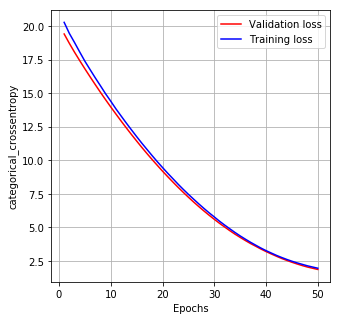

Accuracy: 50.42%                                                                                                       
Test accuracy:                                                                                                         
0.5042416016287751                                                                                                     
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_4 (LSTM)                (None, 128, 64)           18944                                                           
_________________________________________________________________                                                      
batch_normalization_4 (Batch (None, 128, 64)           256                                                             
________________________________________

The number of epochs model is trained for :                                                                            
50                                                                                                                     
  5%|██▎                                            | 1/20 [49:38<9:22:13, 1775.43s/it, best loss: -0.5042416016287751]

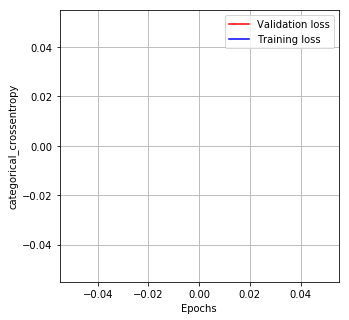

Accuracy: 16.83%                                                                                                       
Test accuracy:                                                                                                         
0.168306752629793                                                                                                      
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_7 (LSTM)                (None, 128, 32)           5376                                                            
_________________________________________________________________                                                      
batch_normalization_7 (Batch (None, 128, 32)           128                                                             
________________________________________

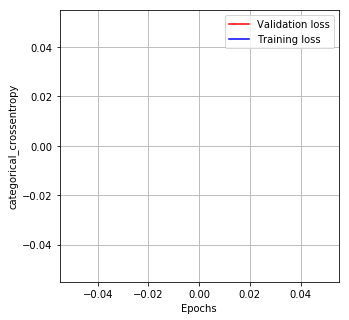

Accuracy: 16.83%                                                                                                       
Test accuracy:                                                                                                         
0.168306752629793                                                                                                      
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_10 (LSTM)               (None, 128, 200)          168000                                                          
_________________________________________________________________                                                      
batch_normalization_10 (Batc (None, 128, 200)          800                                                             
________________________________________

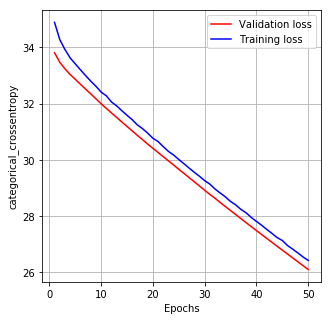

Accuracy: 58.91%                                                                                                       
Test accuracy:                                                                                                         
0.5890736342042755                                                                                                     
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_12 (LSTM)               (None, 128, 200)          168000                                                          
_________________________________________________________________                                                      
batch_normalization_12 (Batc (None, 128, 200)          800                                                             
________________________________________

The number of epochs model is trained for :                                                                            
50                                                                                                                     
 20%|█████████                                    | 4/20 [1:26:19<4:54:25, 1104.08s/it, best loss: -0.5890736342042755]

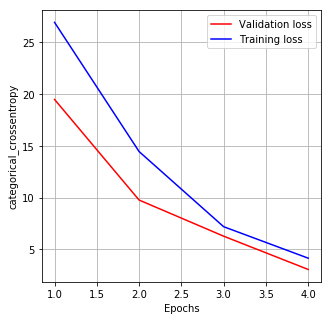

Accuracy: 16.83%                                                                                                       
Test accuracy:                                                                                                         
0.168306752629793                                                                                                      
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_15 (LSTM)               (None, 128, 100)          44000                                                           
_________________________________________________________________                                                      
batch_normalization_15 (Batc (None, 128, 100)          400                                                             
________________________________________

The number of epochs model is trained for :                                                                            
50                                                                                                                     
 25%|███████████▎                                 | 5/20 [1:37:23<4:27:43, 1070.88s/it, best loss: -0.5890736342042755]

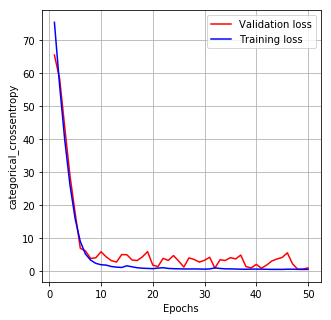

Accuracy: 83.54%                                                                                                       
Test accuracy:                                                                                                         
0.835425856803529                                                                                                      
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_18 (LSTM)               (None, 128, 32)           5376                                                            
_________________________________________________________________                                                      
batch_normalization_18 (Batc (None, 128, 32)           128                                                             
________________________________________

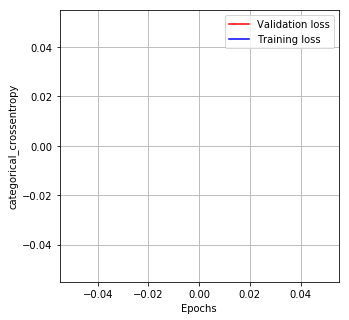

Accuracy: 16.83%                                                                                                       
Test accuracy:                                                                                                         
0.168306752629793                                                                                                      
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_21 (LSTM)               (None, 128, 200)          168000                                                          
_________________________________________________________________                                                      
batch_normalization_21 (Batc (None, 128, 200)          800                                                             
________________________________________

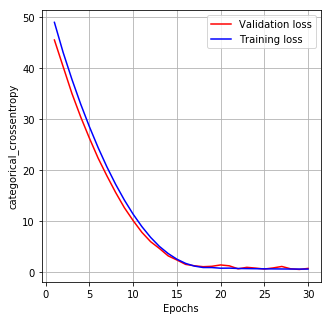

Accuracy: 77.20%                                                                                                       
Test accuracy:                                                                                                         
0.7719714964370546                                                                                                     
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_23 (LSTM)               (None, 128, 200)          168000                                                          
_________________________________________________________________                                                      
batch_normalization_23 (Batc (None, 128, 200)          800                                                             
________________________________________

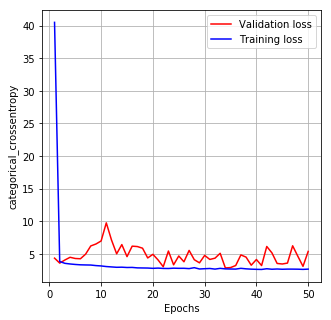

Accuracy: 33.25%                                                                                                       
Test accuracy:                                                                                                         
0.332541567695962                                                                                                      
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_25 (LSTM)               (None, 128, 200)          168000                                                          
_________________________________________________________________                                                      
batch_normalization_25 (Batc (None, 128, 200)          800                                                             
________________________________________

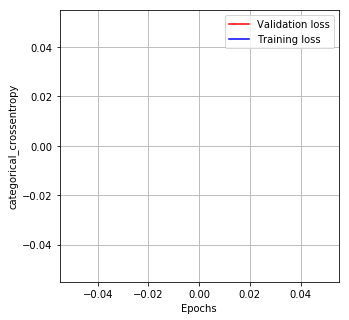

Accuracy: 16.83%                                                                                                       
Test accuracy:                                                                                                         
0.168306752629793                                                                                                      
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_27 (LSTM)               (None, 128, 200)          168000                                                          
_________________________________________________________________                                                      
batch_normalization_27 (Batc (None, 128, 200)          800                                                             
________________________________________

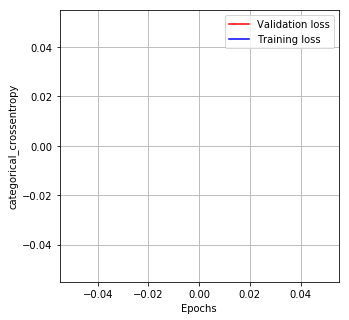

Accuracy: 16.83%                                                                                                       
Test accuracy:                                                                                                         
0.168306752629793                                                                                                      
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_29 (LSTM)               (None, 128, 32)           5376                                                            
_________________________________________________________________                                                      
batch_normalization_29 (Batc (None, 128, 32)           128                                                             
________________________________________

 - 11s - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1603                                                     

Epoch 55/60                                                                                                            
 - 11s - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1603                                                     

Epoch 56/60                                                                                                            
 - 11s - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1603                                                     

Epoch 57/60                                                                                                            
 - 11s - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1603                                                     

Epoch 58/60                                                                                                            
 - 11s - loss: nan - acc: 0.1675 - v

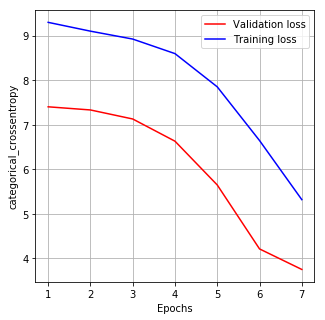

Accuracy: 16.83%                                                                                                       
Test accuracy:                                                                                                         
0.168306752629793                                                                                                      
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_31 (LSTM)               (None, 128, 200)          168000                                                          
_________________________________________________________________                                                      
batch_normalization_31 (Batc (None, 128, 200)          800                                                             
________________________________________

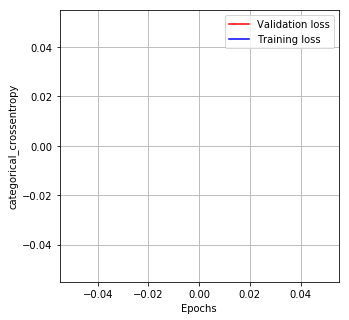

Accuracy: 18.22%                                                                                                       
Test accuracy:                                                                                                         
0.18221920597217509                                                                                                    
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_33 (LSTM)               (None, 128, 32)           5376                                                            
_________________________________________________________________                                                      
batch_normalization_33 (Batc (None, 128, 32)           128                                                             
________________________________________

The number of epochs model is trained for :                                                                            
50                                                                                                                     
 65%|█████████████████████████████▉                | 13/20 [3:27:55<1:33:06, 798.09s/it, best loss: -0.835425856803529]

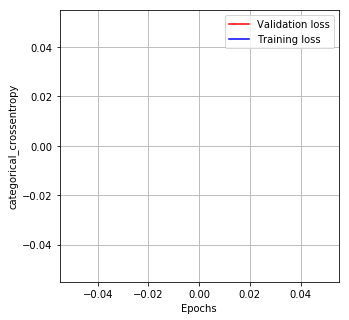

Accuracy: 16.83%                                                                                                       
Test accuracy:                                                                                                         
0.168306752629793                                                                                                      
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_36 (LSTM)               (None, 128, 32)           5376                                                            
_________________________________________________________________                                                      
batch_normalization_36 (Batc (None, 128, 32)           128                                                             
________________________________________

 - 11s - loss: nan - acc: 0.1911 - val_loss: nan - val_acc: 0.1889                                                     

Epoch 55/60                                                                                                            
 - 11s - loss: nan - acc: 0.1921 - val_loss: nan - val_acc: 0.1889                                                     

Epoch 56/60                                                                                                            
 - 11s - loss: nan - acc: 0.1997 - val_loss: nan - val_acc: 0.1889                                                     

Epoch 57/60                                                                                                            
 - 11s - loss: nan - acc: 0.1926 - val_loss: nan - val_acc: 0.1889                                                     

Epoch 58/60                                                                                                            
 - 11s - loss: nan - acc: 0.1929 - v

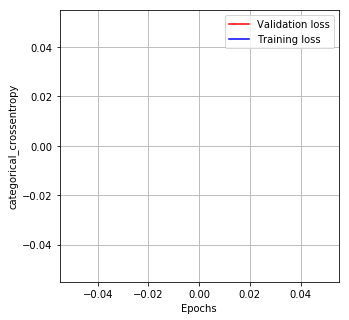

Accuracy: 18.22%                                                                                                       
Test accuracy:                                                                                                         
0.18221920597217509                                                                                                    
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_38 (LSTM)               (None, 128, 32)           5376                                                            
_________________________________________________________________                                                      
batch_normalization_38 (Batc (None, 128, 32)           128                                                             
________________________________________

 - 33s - loss: 0.9412 - acc: 0.6459 - val_loss: 0.8944 - val_acc: 0.6807                                               

Epoch 52/60                                                                                                            
 - 33s - loss: 0.9461 - acc: 0.6398 - val_loss: 0.9907 - val_acc: 0.5177                                               

Epoch 53/60                                                                                                            
 - 32s - loss: 0.9624 - acc: 0.6391 - val_loss: 0.8334 - val_acc: 0.6196                                               

Epoch 54/60                                                                                                            
 - 32s - loss: 0.9808 - acc: 0.6350 - val_loss: 2.4909 - val_acc: 0.4253                                               

Epoch 55/60                                                                                                            
 - 32s - loss: 1.0626 - acc: 0.5843 

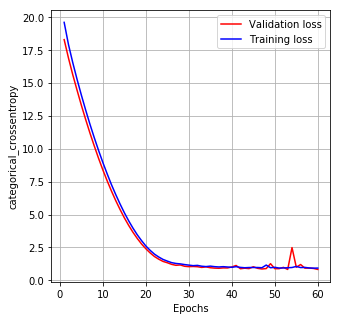

Accuracy: 61.55%                                                                                                       
Test accuracy:                                                                                                         
0.6155412283678316                                                                                                     
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_41 (LSTM)               (None, 128, 64)           18944                                                           
_________________________________________________________________                                                      
batch_normalization_41 (Batc (None, 128, 64)           256                                                             
________________________________________

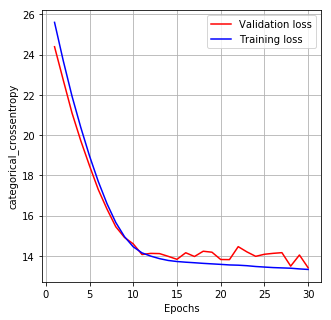

Accuracy: 45.57%                                                                                                       
Test accuracy:                                                                                                         
0.45571767899558874                                                                                                    
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_44 (LSTM)               (None, 128, 200)          168000                                                          
_________________________________________________________________                                                      
batch_normalization_44 (Batc (None, 128, 200)          800                                                             
________________________________________

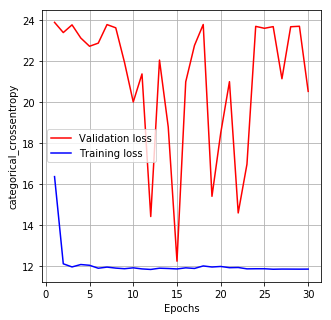

Accuracy: 33.93%                                                                                                       
Test accuracy:                                                                                                         
0.33932813030200204                                                                                                    
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_46 (LSTM)               (None, 128, 32)           5376                                                            
_________________________________________________________________                                                      
batch_normalization_46 (Batc (None, 128, 32)           128                                                             
________________________________________

 - 26s - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1603                                                     

Epoch 55/60                                                                                                            
 - 26s - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1603                                                     

Epoch 56/60                                                                                                            
 - 26s - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1603                                                     

Epoch 57/60                                                                                                            
 - 27s - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1603                                                     

Epoch 58/60                                                                                                            
 - 27s - loss: nan - acc: 0.1675 - v

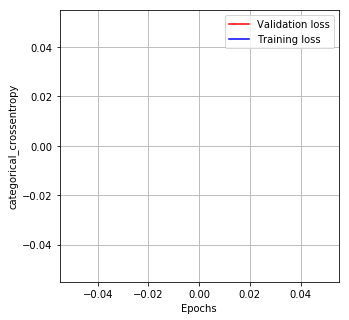

Accuracy: 16.83%                                                                                                       
Test accuracy:                                                                                                         
0.168306752629793                                                                                                      
_________________________________________________________________                                                      
Layer (type)                 Output Shape              Param #                                                         
lstm_48 (LSTM)               (None, 128, 32)           5376                                                            
_________________________________________________________________                                                      
batch_normalization_48 (Batc (None, 128, 32)           128                                                             
________________________________________

 - 17s - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1603                                                     

Epoch 52/60                                                                                                            
 - 16s - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1603                                                     

Epoch 53/60                                                                                                            
 - 17s - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1603                                                     

Epoch 54/60                                                                                                            
 - 17s - loss: nan - acc: 0.1675 - val_loss: nan - val_acc: 0.1603                                                     

Epoch 55/60                                                                                                            
 - 16s - loss: nan - acc: 0.1675 - v

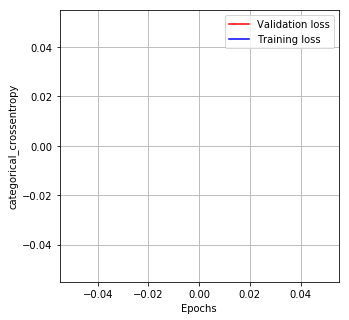

Accuracy: 16.83%                                                                                                       
Test accuracy:                                                                                                         
0.168306752629793                                                                                                      
100%|███████████████████████████████████████████████| 20/20 [5:23:56<00:00, 1237.61s/it, best loss: -0.835425856803529]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Evalutation of best performing model:
2947/2947 [==============================] - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 22s 8ms/step
[0.848180381512294, 0.835425856803529]
Best performing model chosen

In [6]:
best_run, best_model = optim.minimize(model=optimum_model,
                                          data=data,
                                          max_evals=20,
                                          algo=tpe.suggest,
                                          notebook_name = "HAR_LSTM",
                                          trials=Trials())
X_train, y_train, X_test, y_test = data()
print("Evalutation of best performing model:") 
print(best_model.evaluate(X_test, y_test))
print("Best performing model chosen hyper-parameters:")
print(best_run)


# Observations:-   
LSTM with two LSTM layers gave the best accuracy of around 91.04% for HAR dataset.  
The best hyperparameter with two LSTM layers which gave a accuracy of 91.04% are mentioned below:  
- 1st dropout ratio is 0.2, 2nd dropout ratio is 0.2 and 3rd dropout ratio is 0.3
- Activation for 1st LSTM layer is tanh and for 2nd LSTM layer is sigmoid.
- Activation for the dense layer is softmax.
- epochs = 60
- batch size = 128
- optimizer = rmsprop
- units for 1st LSTM layer = 64
- units for 2nd LSTM layer = 32

In [3]:
print("Performance of classical ML models")
table = PrettyTable()
table.field_names = ['Model', 'Accuracy']
table.add_row(['Logistic Regression', 0.962])
table.add_row(['Linear SVM',0.966])
table.add_row(['Kernel SVM - RBF',0.962])
table.add_row(['Decision Tree', 0.864])
table.add_row(['Random Forest',0.913])
table.add_row([' Gradient Boosted Decision Trees',0.922])
print(table,'\n')
print("Performance of LSTM model")
table1 = PrettyTable()
table1.field_names = ['Model', 'Accuracy']
table1.add_row(['LSTM with 2 layers', 0.910])
table1.add_row(['LSTM with 3 layers',0.835 ])
print(table1,'\n')

Performance of classical ML models
+----------------------------------+----------+
|              Model               | Accuracy |
+----------------------------------+----------+
|       Logistic Regression        |  0.962   |
|            Linear SVM            |  0.966   |
|         Kernel SVM - RBF         |  0.962   |
|          Decision Tree           |  0.864   |
|          Random Forest           |  0.913   |
|  Gradient Boosted Decision Trees |  0.922   |
+----------------------------------+----------+ 

Performance of LSTM model
+--------------------+----------+
|       Model        | Accuracy |
+--------------------+----------+
| LSTM with 2 layers |   0.91   |
| LSTM with 3 layers |  0.835   |
+--------------------+----------+ 



# Conclusion :-

- Linear SVM and Logistic Regression perform better as compared to other models. LSTM without any feature engineering performed better than Decision tree and random forest.

# END